<a href="https://colab.research.google.com/github/srkhademi/ML-Based-Dry-Beans-Types-Detection/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initial Libraries and data Import

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from scipy import stats
import warnings

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

!pip install catboost
import catboost as cb
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, CondensedNearestNeighbour

from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv('Dry_Bean_Dataset.csv')

#End of Initial Library import and data import

#Dataset Exploration

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
df.isnull()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [ ]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

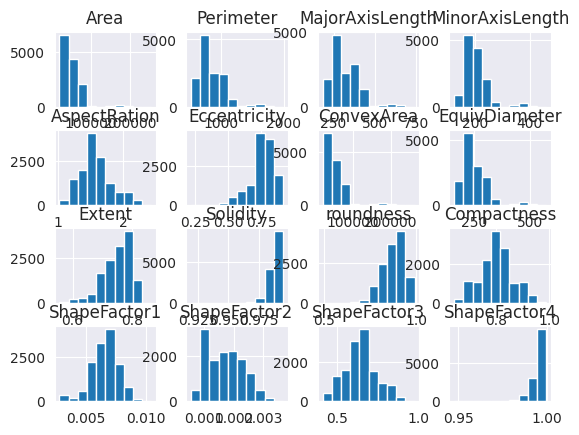

In [ ]:
df.hist()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


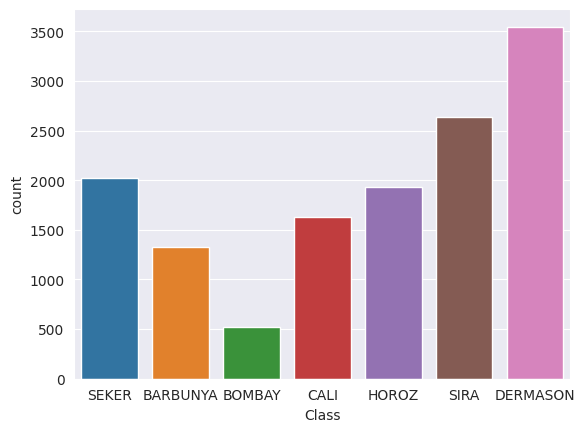

In [ ]:
print(df['Class'].value_counts())
_ = sns.countplot(x='Class', data=df)

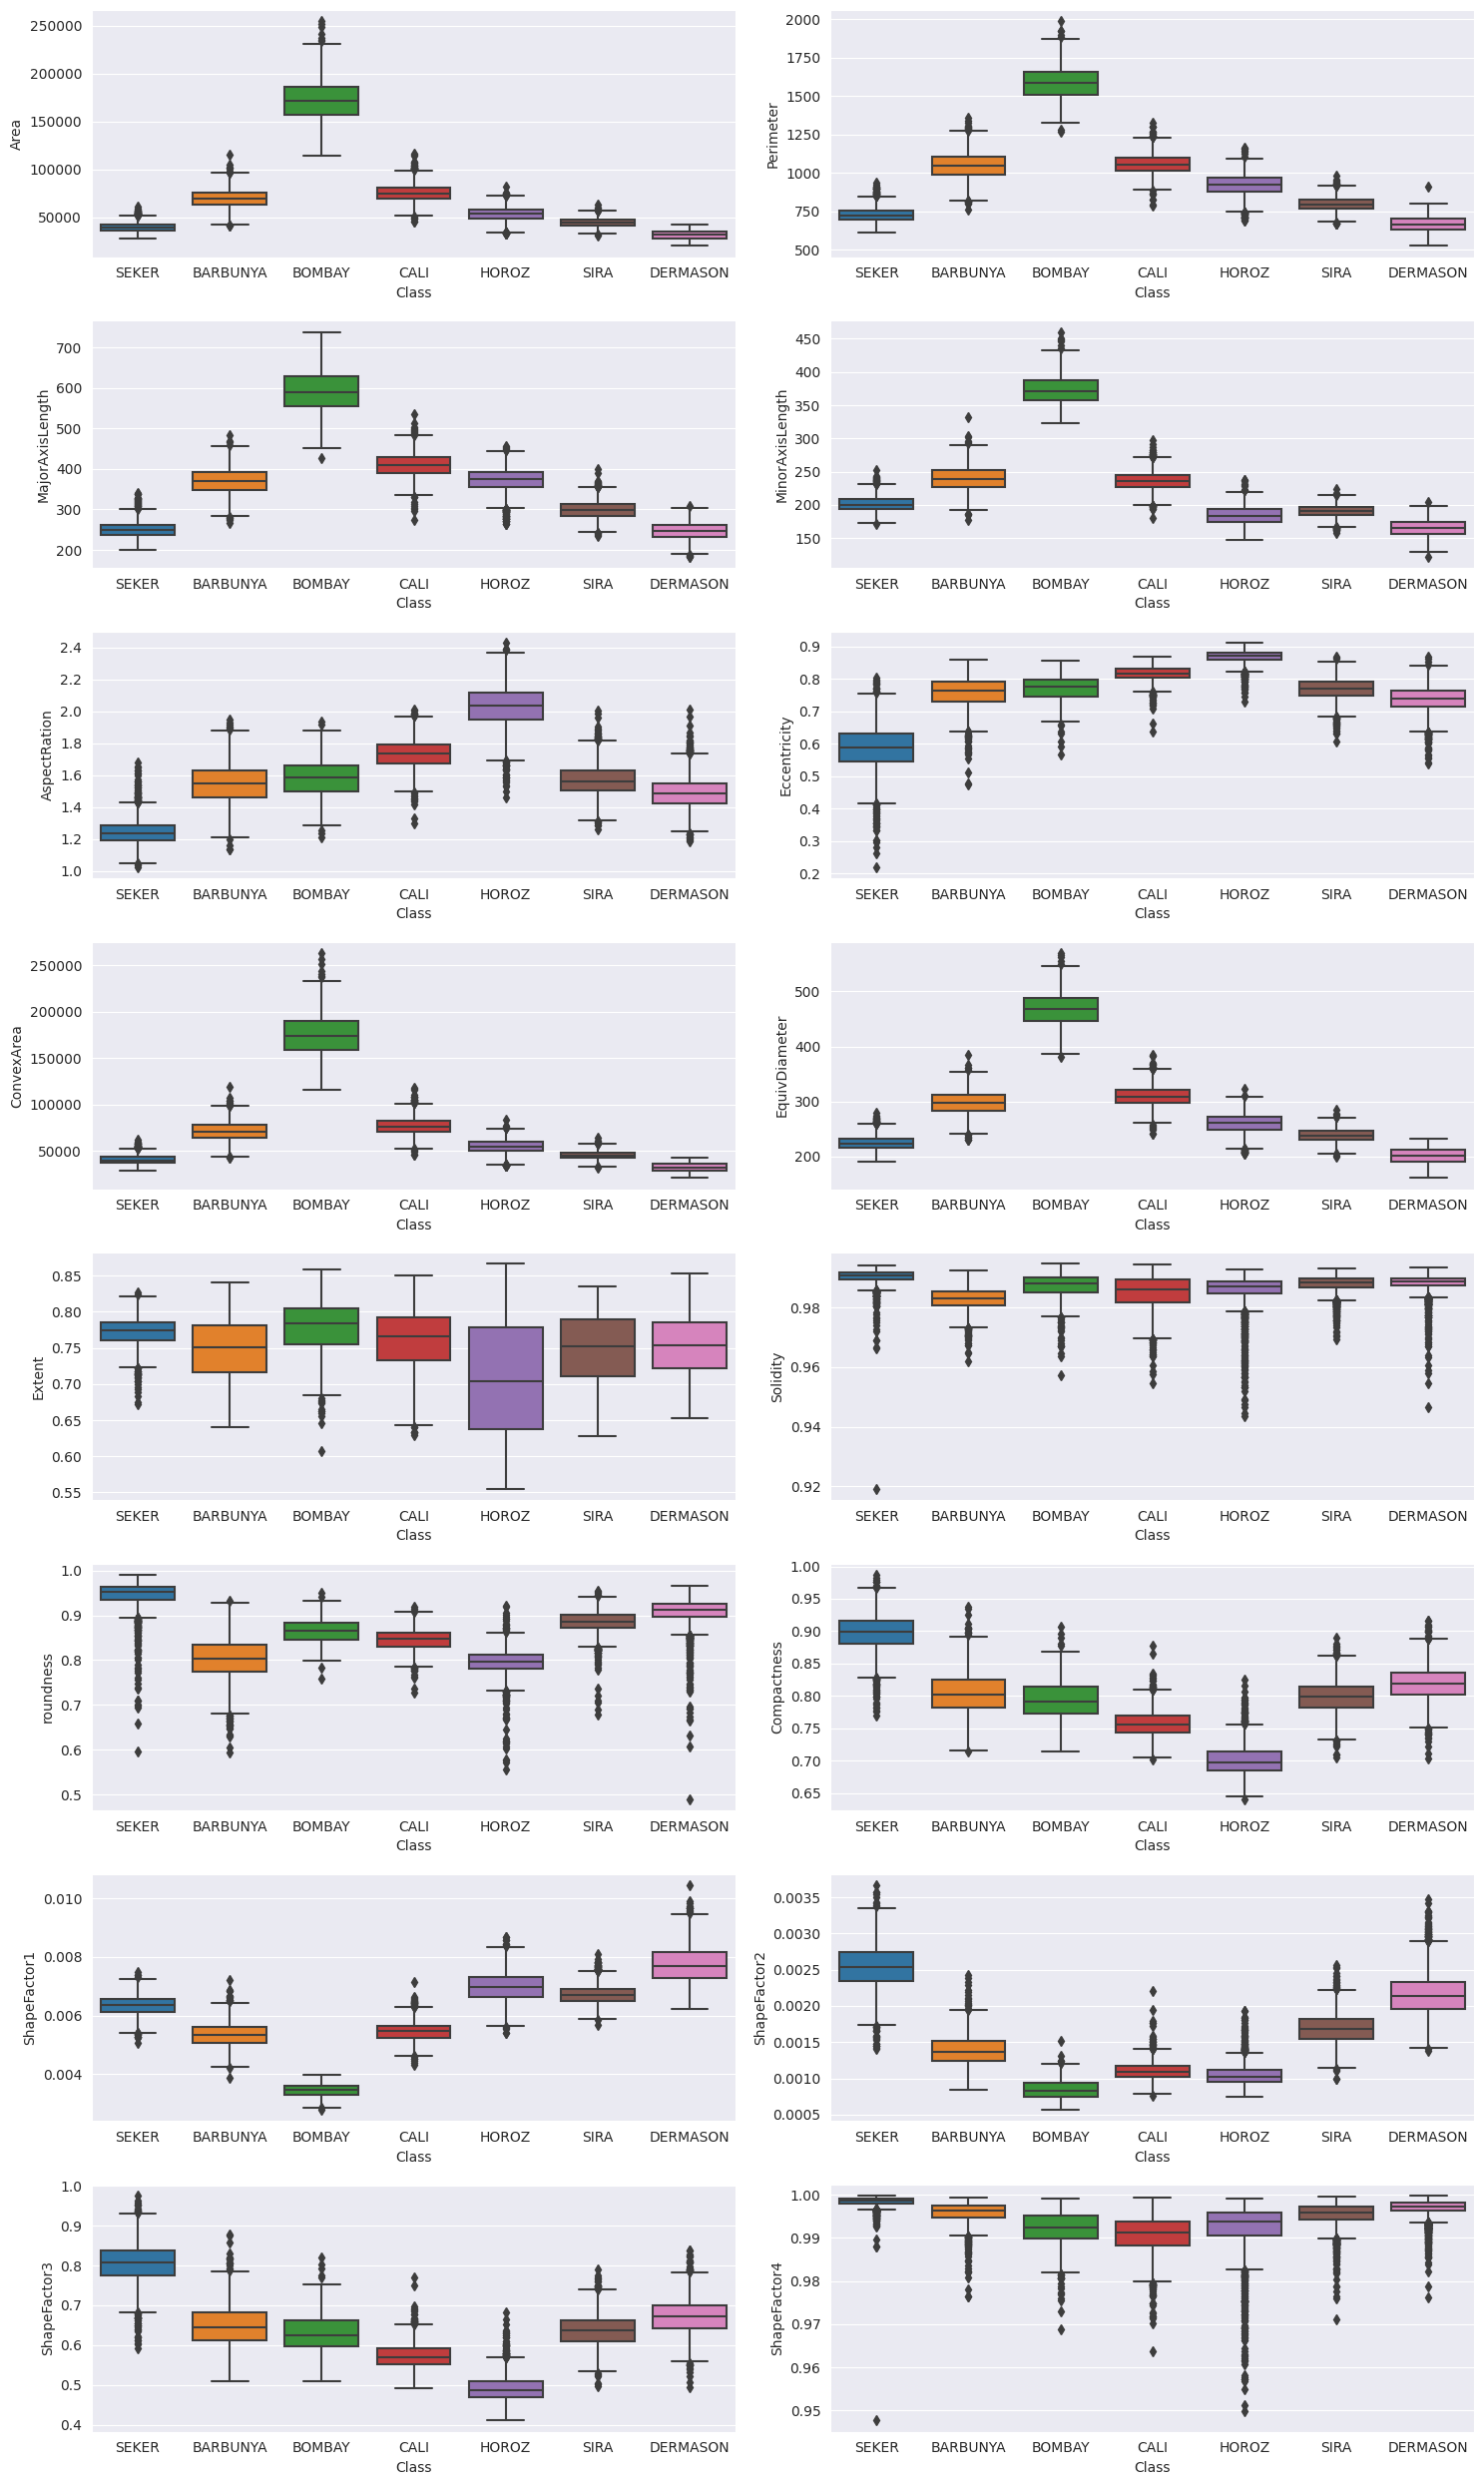

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))
Numeric_cols = df.drop(columns=['Class']).columns
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

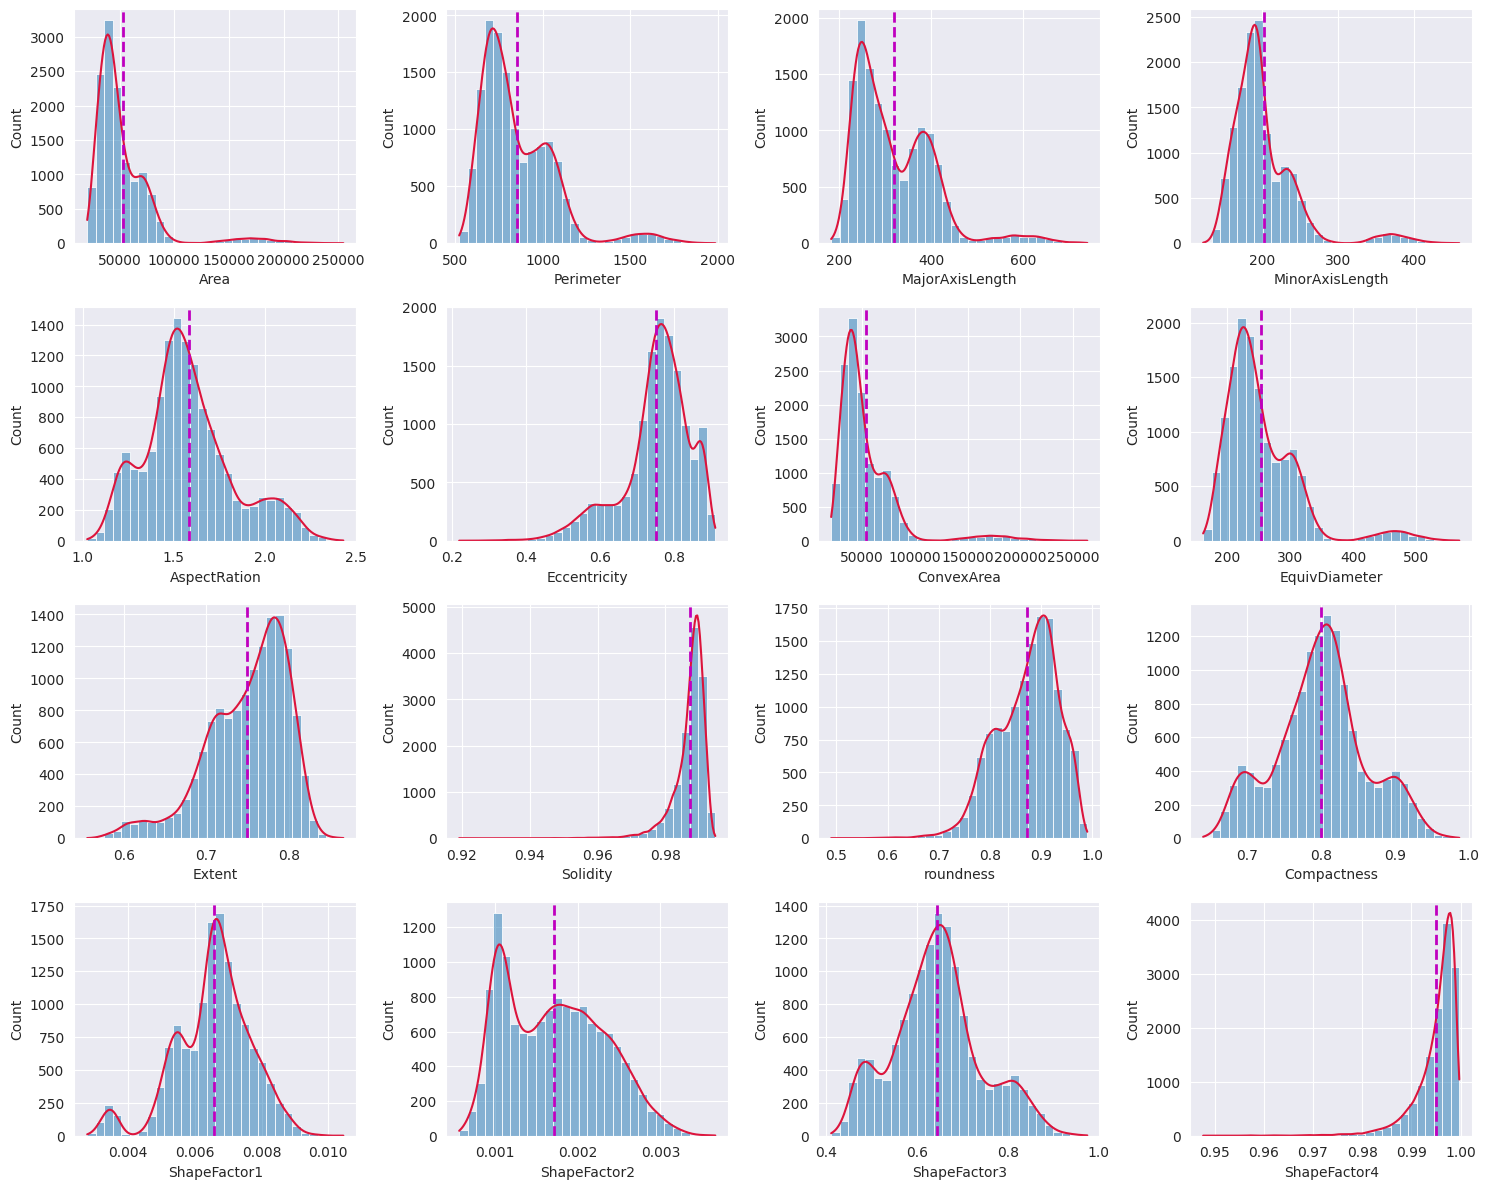

In [ ]:
Numeric_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623  

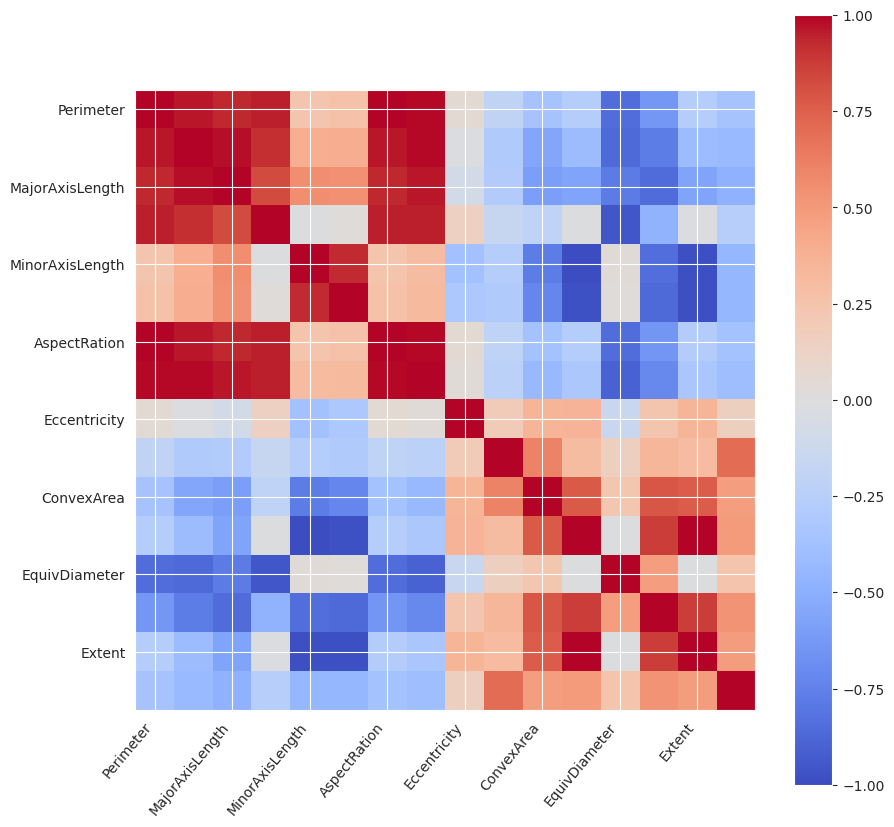

In [ ]:


# Calculate correlation matrix using Pearson method
correlationMatrix = df.corr(method='pearson')

# Print correlation matrix
print(correlationMatrix)

# Create heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(correlationMatrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and rotate x-axis labels
ax.set_xticklabels(df.columns, rotation=50, ha='right')
ax.set_yticklabels(df.columns)

# Show plot
plt.show()


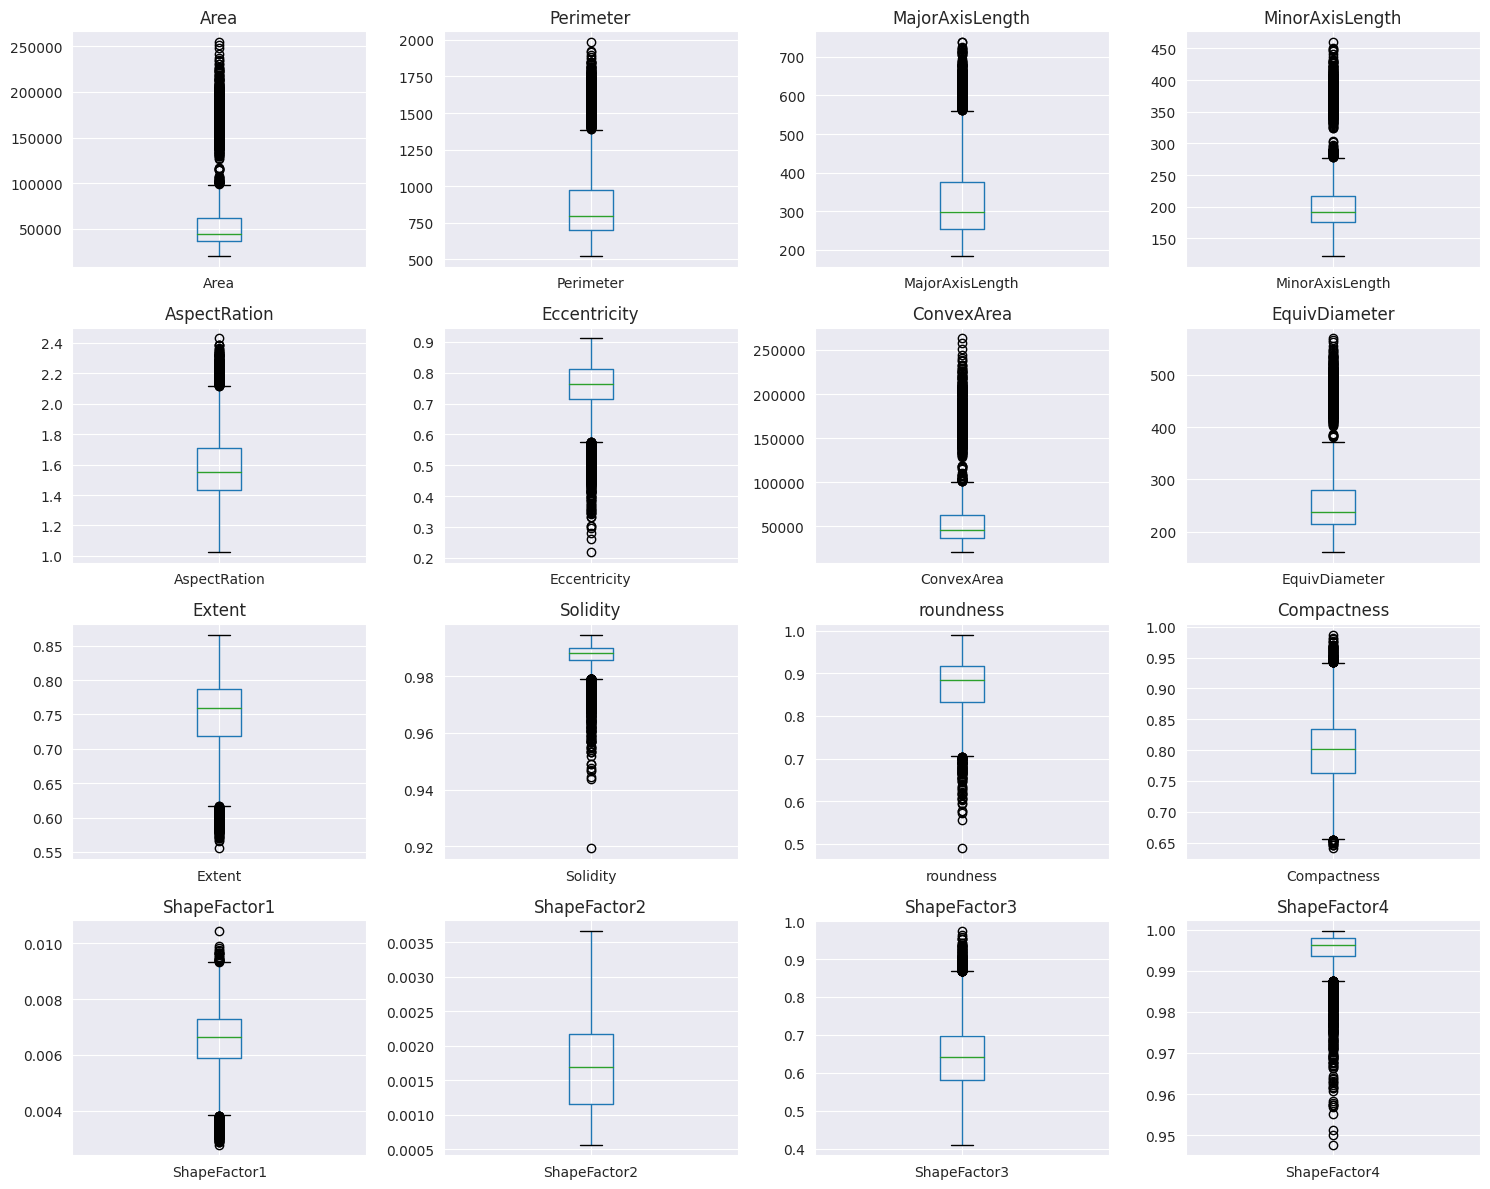

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

# Loop through each numeric column and create a boxplot for it
for i, variable in enumerate(Numeric_cols):
    # Calculate subplot indices
    row = i // 4
    col = i % 4

    # Create boxplot using pandas plot method
    df.boxplot(column=variable, ax=ax[row, col])

    # Set subplot title
    ax[row, col].set_title(variable)

# Adjust subplot spacing
plt.tight_layout()

#End of Dataset Exploration

#LGB Model

Training set evaluation:
[[1015    0   24    1    4    4   13]
 [   0  405    0    0    0    0    0]
 [  16    0 1277    0    9    1   10]
 [   0    0    0 2742    1   26  106]
 [   4    0   13    8 1465    0   30]
 [   3    0    1   22    0 1561   27]
 [   3    0    3  174   21   19 1880]]
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.96      0.97      1061
      BOMBAY       1.00      1.00      1.00       405
        CALI       0.97      0.97      0.97      1313
    DERMASON       0.93      0.95      0.94      2875
       HOROZ       0.98      0.96      0.97      1520
       SEKER       0.97      0.97      0.97      1614
        SIRA       0.91      0.90      0.90      2100

    accuracy                           0.95     10888
   macro avg       0.96      0.96      0.96     10888
weighted avg       0.95      0.95      0.95     10888



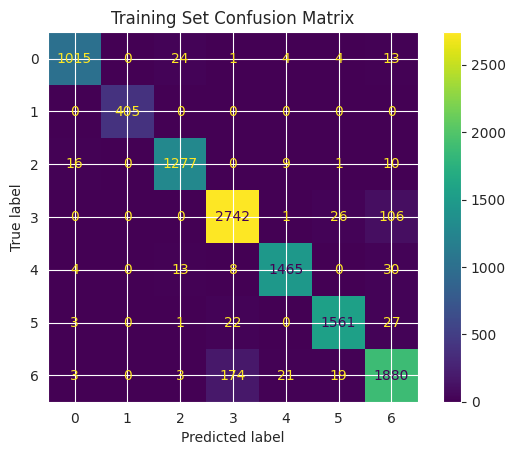

Validation set evaluation:
[[238   0  15   0   0   1   7]
 [  0 117   0   0   0   0   0]
 [ 11   0 300   0   4   1   1]
 [  0   0   0 614   1   5  51]
 [  1   0   6   3 391   0   7]
 [  5   0   0  12   0 388   8]
 [  0   0   1  54   5   4 472]]
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.93      0.95      0.94       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.98      0.96      0.97       408
       SEKER       0.97      0.94      0.96       413
        SIRA       0.86      0.88      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



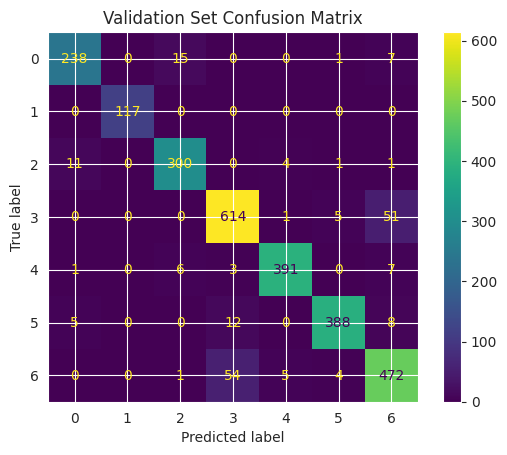

In [ ]:
# Load the dataset and preprocess it.
# Assume that the dataset is already loaded in df variable

# Encode the target variable
# Assume that the target variable is 'Class'

# Split the dataset into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LightGBM model
model_lgb = lgb.LGBMClassifier(random_state=42, silent=True, subsample=0.8, reg_lambda=0.1, reg_alpha=1, num_leaves=5,
                             n_estimators=100, min_child_samples=5, max_depth=5, learning_rate=0.12,
                             colsample_bytree=0.5, boosting_type='goss', metric='multi_error', num_class=7)

model_lgb.fit(X_train, y_train)

# Evaluate the performance of the model and plot the confusion matrices
y_pred_train = model_lgb.predict(X_train)
y_pred_val = model_lgb.predict(X_val)

print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix_train)
disp_train.plot()
plt.title("Training Set Confusion Matrix")
plt.show()

print("Validation set evaluation:")
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
disp_val = ConfusionMatrixDisplay(confusion_matrix_val)
disp_val.plot()
plt.title("Validation Set Confusion Matrix")
plt.show()


#End of LGB Model

#SVC model

Training set evaluation:
[[ 973    0   52    0    5    9   22]
 [   0  405    0    0    0    0    0]
 [  25    0 1256    0   18    3   11]
 [   0    0    0 2675    2   39  159]
 [   1    0   19   13 1454    0   33]
 [   6    0    0   29    0 1533   46]
 [   6    0    2  195   26   22 1849]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1061
           1       1.00      1.00      1.00       405
           2       0.95      0.96      0.95      1313
           3       0.92      0.93      0.92      2875
           4       0.97      0.96      0.96      1520
           5       0.95      0.95      0.95      1614
           6       0.87      0.88      0.88      2100

    accuracy                           0.93     10888
   macro avg       0.95      0.94      0.94     10888
weighted avg       0.93      0.93      0.93     10888



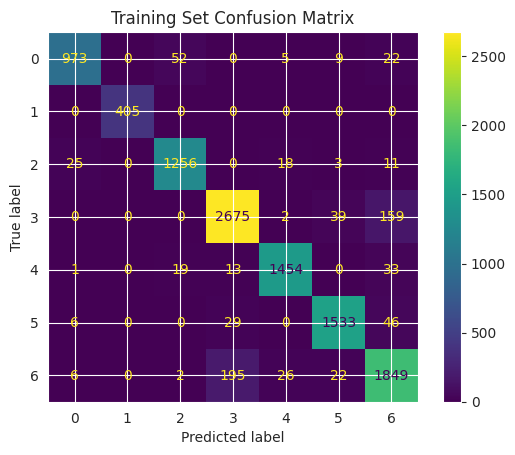

Test set evaluation:
[[240   0  14   0   0   1   6]
 [  0 117   0   0   0   0   0]
 [ 11   0 300   0   4   1   1]
 [  0   0   0 621   0   6  44]
 [  2   0   5   4 391   0   6]
 [  3   0   0   9   0 393   8]
 [  1   0   0  45   5   4 481]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       261
           1       1.00      1.00      1.00       117
           2       0.94      0.95      0.94       317
           3       0.91      0.93      0.92       671
           4       0.98      0.96      0.97       408
           5       0.97      0.95      0.96       413
           6       0.88      0.90      0.89       536

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



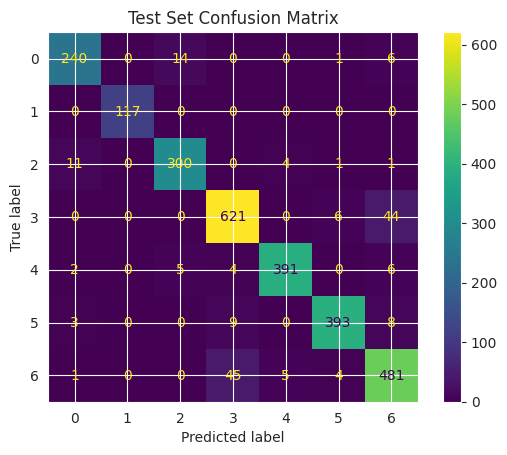

In [ ]:


##############Load the dataset and preprocess it.

# Encode the target variable
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes

# Split the dataset into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

################Train the SVC model.
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train_scaled, y_train)


###############Evaluate the performance of the model and plot the confusion matrices.


y_pred_train = svc_model.predict(X_train_scaled)
y_pred_test = svc_model.predict(X_test_scaled)

print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix_train)
disp_train.plot()
plt.title("Training Set Confusion Matrix")
plt.show()

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix_test)
disp_test.plot()
plt.title("Test Set Confusion Matrix")
plt.show()


#End of SVC model

#Decision Tree model

Training set evaluation:
[[1061    0    0    0    0    0    0]
 [   0  405    0    0    0    0    0]
 [   0    0 1313    0    0    0    0]
 [   0    0    0 2875    0    0    0]
 [   0    0    0    0 1520    0    0]
 [   0    0    0    0    0 1614    0]
 [   0    0    0    0    0    0 2100]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       405
           2       1.00      1.00      1.00      1313
           3       1.00      1.00      1.00      2875
           4       1.00      1.00      1.00      1520
           5       1.00      1.00      1.00      1614
           6       1.00      1.00      1.00      2100

    accuracy                           1.00     10888
   macro avg       1.00      1.00      1.00     10888
weighted avg       1.00      1.00      1.00     10888



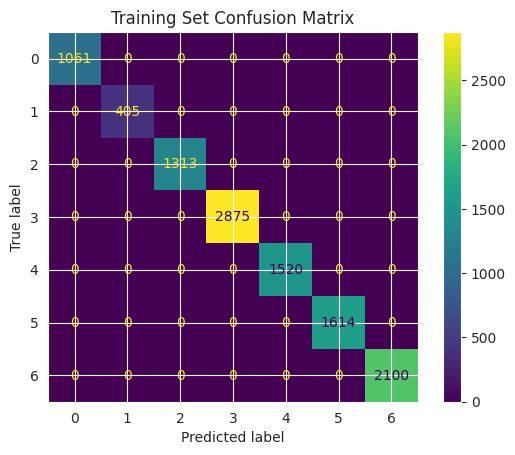

Test set evaluation:
[[229   0  22   0   1   2   7]
 [  0 117   0   0   0   0   0]
 [ 21   0 289   0   5   0   2]
 [  1   0   0 591   4  13  62]
 [  4   0  12   4 379   0   9]
 [  2   0   0  20   0 379  12]
 [  7   0   1  58   9  14 447]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       261
           1       1.00      1.00      1.00       117
           2       0.89      0.91      0.90       317
           3       0.88      0.88      0.88       671
           4       0.95      0.93      0.94       408
           5       0.93      0.92      0.92       413
           6       0.83      0.83      0.83       536

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723



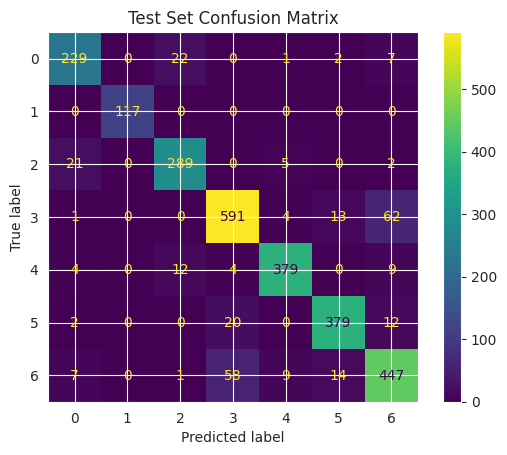

In [ ]:

###########Load the dataset and preprocess it.


# Encode the target variable
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes

# Split the dataset into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#############Train the Decision Tree model.
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)


###########Evaluate the performance of the model and plot the confusion matrices

y_pred_train = dt.predict(X_train_scaled)
y_pred_test = dt.predict(X_test_scaled)

print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix_train)
disp_train.plot()
plt.title("Training Set Confusion Matrix")
plt.show()

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix_test)
disp_test.plot()
plt.title("Test Set Confusion Matrix")
plt.show()


#End of decision Tree model


#MLP Model

In [ ]:


###########


# Encode the target variable
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes

# Split the dataset into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


########################



mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10, random_state=42, tol=0.0001)

mlp.fit(X_train_scaled, y_train)




####################


y_pred_train = mlp.predict(X_train_scaled)
y_pred_test = mlp.predict(X_test_scaled)

print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))



Iteration 1, loss = 0.77384640
Iteration 2, loss = 0.23590289
Iteration 3, loss = 0.20918547
Iteration 4, loss = 0.20118463
Iteration 5, loss = 0.20036118
Iteration 6, loss = 0.19457809
Iteration 7, loss = 0.18941260
Iteration 8, loss = 0.18911697
Iteration 9, loss = 0.18585408
Iteration 10, loss = 0.18393557
Iteration 11, loss = 0.18576296
Iteration 12, loss = 0.18208926
Iteration 13, loss = 0.18222657
Iteration 14, loss = 0.17989578
Iteration 15, loss = 0.17990996
Iteration 16, loss = 0.17941386
Iteration 17, loss = 0.17539640
Iteration 18, loss = 0.17759045
Iteration 19, loss = 0.17654542
Iteration 20, loss = 0.17544702
Iteration 21, loss = 0.17574506
Iteration 22, loss = 0.17411731
Iteration 23, loss = 0.17299093
Iteration 24, loss = 0.17045212
Iteration 25, loss = 0.17071225
Iteration 26, loss = 0.16881855
Iteration 27, loss = 0.17217229
Iteration 28, loss = 0.16803113
Iteration 29, loss = 0.16850126
Iteration 30, loss = 0.16744440
Iteration 31, loss = 0.16587774
Iteration 32, los

Training set evaluation:
[[1059    0    2    0    0    0    0]
 [   0  405    0    0    0    0    0]
 [   8    0 1302    0    2    1    0]
 [   0    0    0 2824    0   28   23]
 [   3    0    5    5 1503    0    4]
 [   0    0    0   15    0 1593    6]
 [   1    0    1  164    6   11 1917]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1061
           1       1.00      1.00      1.00       405
           2       0.99      0.99      0.99      1313
           3       0.94      0.98      0.96      2875
           4       0.99      0.99      0.99      1520
           5       0.98      0.99      0.98      1614
           6       0.98      0.91      0.95      2100

    accuracy                           0.97     10888
   macro avg       0.98      0.98      0.98     10888
weighted avg       0.97      0.97      0.97     10888



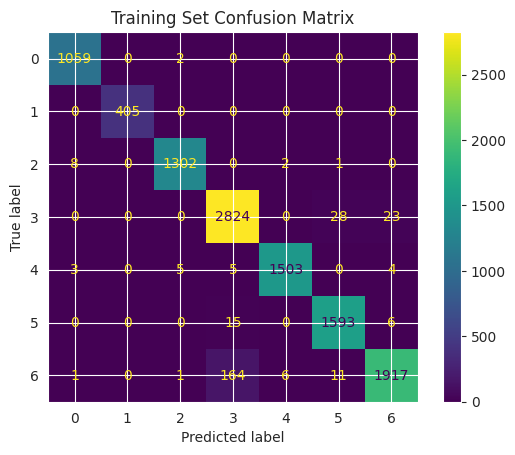

Test set evaluation:
[[241   0  14   0   0   1   5]
 [  0 117   0   0   0   0   0]
 [ 10   0 299   0   6   1   1]
 [  0   0   0 625   2  11  33]
 [  3   0   7   3 388   0   7]
 [  4   0   0   8   0 395   6]
 [  5   0   2  57   6   9 457]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       261
           1       1.00      1.00      1.00       117
           2       0.93      0.94      0.94       317
           3       0.90      0.93      0.92       671
           4       0.97      0.95      0.96       408
           5       0.95      0.96      0.95       413
           6       0.90      0.85      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



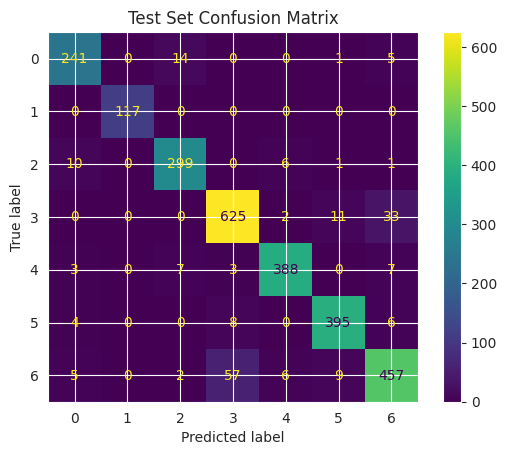

In [ ]:

y_pred_train = mlp.predict(X_train_scaled)
y_pred_test = mlp.predict(X_test_scaled)

print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix_train)
disp_train.plot()
plt.title("Training Set Confusion Matrix")
plt.show()

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix_test)
disp_test.plot()
plt.title("Test Set Confusion Matrix")
plt.show()


#End of MLP model

#KNN Model

Training set evaluation:
[[ 991    0   39    0    4    8   19]
 [   0  405    0    0    0    0    0]
 [  19    0 1266    0   17    2    9]
 [   0    0    0 2716    6   35  118]
 [   5    0   17   12 1450    0   36]
 [   3    0    0   30    1 1547   33]
 [   7    0    5  149   22   25 1892]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1061
           1       1.00      1.00      1.00       405
           2       0.95      0.96      0.96      1313
           3       0.93      0.94      0.94      2875
           4       0.97      0.95      0.96      1520
           5       0.96      0.96      0.96      1614
           6       0.90      0.90      0.90      2100

    accuracy                           0.94     10888
   macro avg       0.95      0.95      0.95     10888
weighted avg       0.94      0.94      0.94     10888



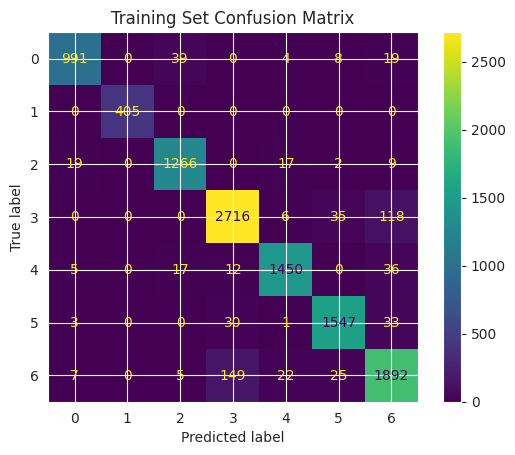

Test set evaluation:
[[235   0  18   0   0   1   7]
 [  0 117   0   0   0   0   0]
 [  4   0 304   0   5   1   3]
 [  0   0   0 612   1   5  53]
 [  0   0   9   4 389   0   6]
 [  3   0   0  10   0 391   9]
 [  2   0   1  59   4   4 466]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       261
           1       1.00      1.00      1.00       117
           2       0.92      0.96      0.94       317
           3       0.89      0.91      0.90       671
           4       0.97      0.95      0.96       408
           5       0.97      0.95      0.96       413
           6       0.86      0.87      0.86       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723



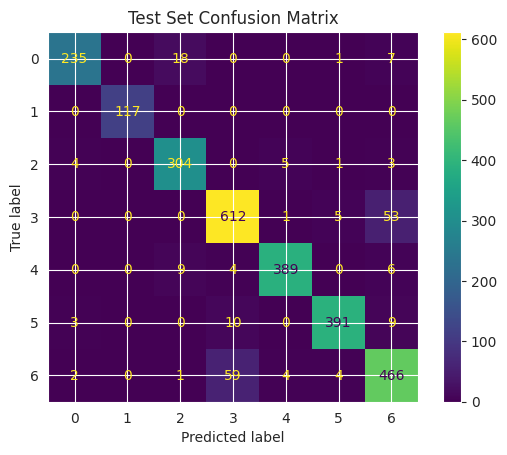

In [ ]:



##########################Load the dataset and preprocess it.

# Encode the target variable
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes

# Split the dataset into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#############Train the KNN model.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

############Evaluate the performance of the model and plot the confusion matrices.

y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix_train)
disp_train.plot()
plt.title("Training Set Confusion Matrix")
plt.show()

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix_test)
disp_test.plot()
plt.title("Test Set Confusion Matrix")
plt.show()


#End of KNN Model


#SVM model


Training set evaluation:
[[ 973    0   52    0    5    9   22]
 [   0  405    0    0    0    0    0]
 [  25    0 1256    0   18    3   11]
 [   0    0    0 2675    2   39  159]
 [   1    0   19   13 1454    0   33]
 [   6    0    0   29    0 1533   46]
 [   6    0    2  195   26   22 1849]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1061
           1       1.00      1.00      1.00       405
           2       0.95      0.96      0.95      1313
           3       0.92      0.93      0.92      2875
           4       0.97      0.96      0.96      1520
           5       0.95      0.95      0.95      1614
           6       0.87      0.88      0.88      2100

    accuracy                           0.93     10888
   macro avg       0.95      0.94      0.94     10888
weighted avg       0.93      0.93      0.93     10888



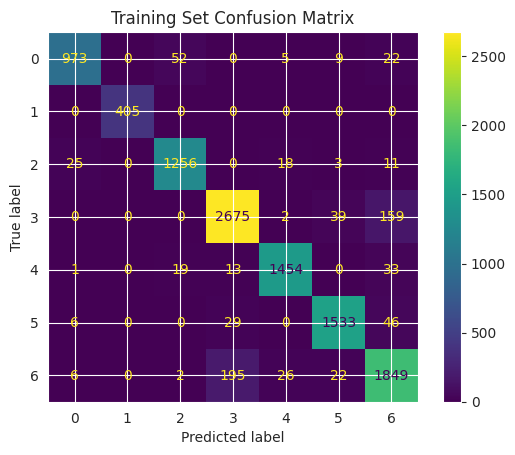

Test set evaluation:
[[240   0  14   0   0   1   6]
 [  0 117   0   0   0   0   0]
 [ 11   0 300   0   4   1   1]
 [  0   0   0 621   0   6  44]
 [  2   0   5   4 391   0   6]
 [  3   0   0   9   0 393   8]
 [  1   0   0  45   5   4 481]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       261
           1       1.00      1.00      1.00       117
           2       0.94      0.95      0.94       317
           3       0.91      0.93      0.92       671
           4       0.98      0.96      0.97       408
           5       0.97      0.95      0.96       413
           6       0.88      0.90      0.89       536

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



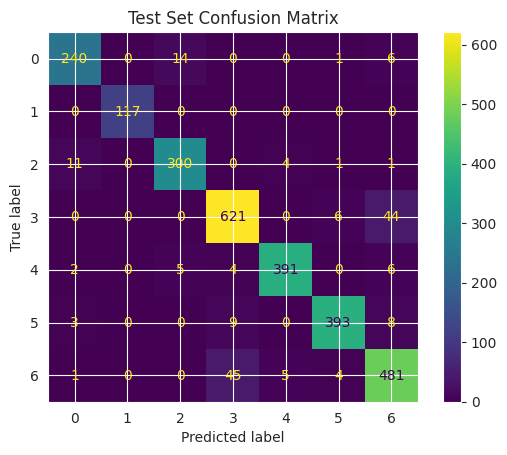

In [ ]:


#########################Load the dataset and preprocess it.


# Encode the target variable
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes

# Split the dataset into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##################Train the SVM model.

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)


##################Evaluate the performance of the model and plot the confusion matrices.

y_pred_train = svm.predict(X_train_scaled)
y_pred_test = svm.predict(X_test_scaled)

print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix_train)
disp_train.plot()
plt.title("Training Set Confusion Matrix")
plt.show()

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix_test)
disp_test.plot()
plt.title("Test Set Confusion Matrix")
plt.show()



#End of SVM Model

#Logistic Regression Model

Training set evaluation:
[[ 964    0   57    0    4    9   27]
 [   0  405    0    0    0    0    0]
 [  34    0 1241    0   21    3   14]
 [   1    0    0 2649    2   42  181]
 [   2    0   25   14 1447    0   32]
 [  12    0    1   22    1 1528   50]
 [   3    0    7  185   40   31 1834]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1061
           1       1.00      1.00      1.00       405
           2       0.93      0.95      0.94      1313
           3       0.92      0.92      0.92      2875
           4       0.96      0.95      0.95      1520
           5       0.95      0.95      0.95      1614
           6       0.86      0.87      0.87      2100

    accuracy                           0.92     10888
   macro avg       0.94      0.94      0.94     10888
weighted avg       0.93      0.92      0.92     10888



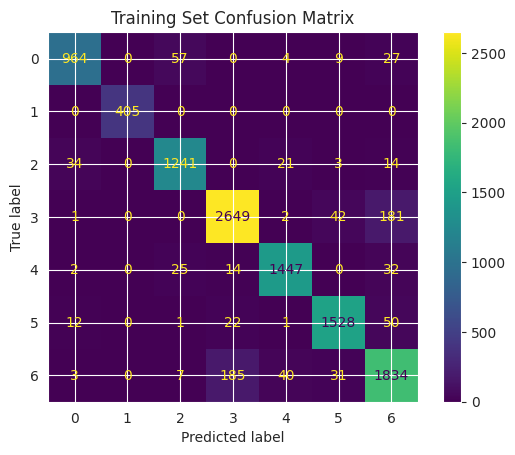

Test set evaluation:
[[238   0  14   0   0   0   9]
 [  0 117   0   0   0   0   0]
 [ 11   0 298   0   4   1   3]
 [  0   0   0 606   1   8  56]
 [  2   0   2   4 392   0   8]
 [  8   0   0   6   0 388  11]
 [  0   0   0  40   7   5 484]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       261
           1       1.00      1.00      1.00       117
           2       0.95      0.94      0.94       317
           3       0.92      0.90      0.91       671
           4       0.97      0.96      0.97       408
           5       0.97      0.94      0.95       413
           6       0.85      0.90      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



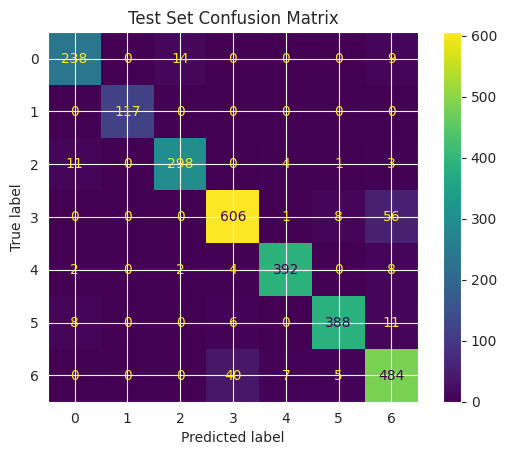

In [ ]:



################Load the dataset and preprocess it.


# Encode the target variable
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes

# Split the dataset into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

########################Train the Logistic Regression model.
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


#########################Evaluate the performance of the model and plot the confusion matrices.


y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix_train)
disp_train.plot()
plt.title("Training Set Confusion Matrix")
plt.show()

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix_test)
disp_test.plot()
plt.title("Test Set Confusion Matrix")
plt.show()


#End of Logistic Regression Model


#XGBoost model

Training set evaluation:
[[1061    0    0    0    0    0    0]
 [   0  405    0    0    0    0    0]
 [   0    0 1313    0    0    0    0]
 [   0    0    0 2875    0    0    0]
 [   0    0    0    0 1520    0    0]
 [   0    0    0    0    0 1614    0]
 [   0    0    0    0    0    0 2100]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       405
           2       1.00      1.00      1.00      1313
           3       1.00      1.00      1.00      2875
           4       1.00      1.00      1.00      1520
           5       1.00      1.00      1.00      1614
           6       1.00      1.00      1.00      2100

    accuracy                           1.00     10888
   macro avg       1.00      1.00      1.00     10888
weighted avg       1.00      1.00      1.00     10888



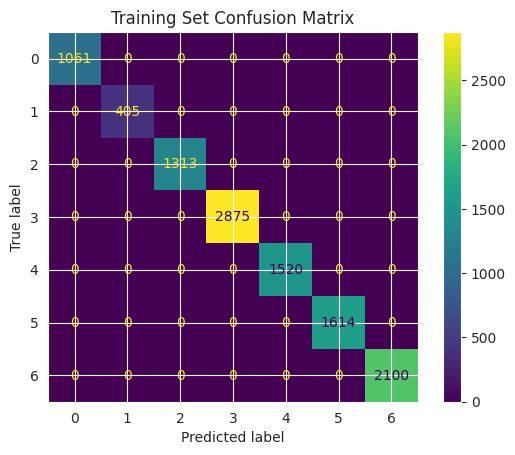

Test set evaluation:
[[239   0  13   0   0   2   7]
 [  0 117   0   0   0   0   0]
 [  9   0 303   0   3   1   1]
 [  0   0   0 616   1   6  48]
 [  2   0   4   3 392   0   7]
 [  5   0   0  12   0 389   7]
 [  0   0   1  53   5   7 470]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       261
           1       1.00      1.00      1.00       117
           2       0.94      0.96      0.95       317
           3       0.90      0.92      0.91       671
           4       0.98      0.96      0.97       408
           5       0.96      0.94      0.95       413
           6       0.87      0.88      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



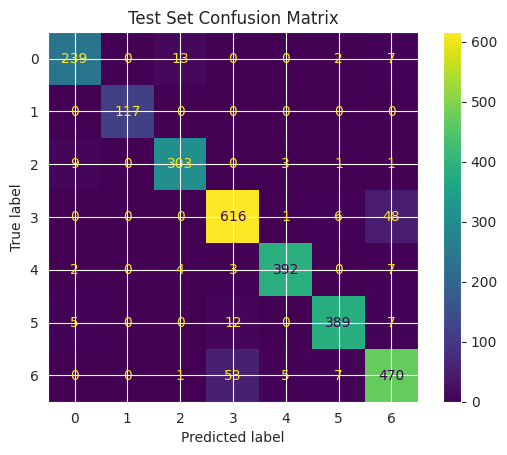

In [ ]:



###############Load the dataset and preprocess it.


# Encode the target variable
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes

# Split the dataset into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#################Train the XGBoost model.
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, seed=42)
xgb_model.fit(X_train_scaled, y_train)


###############Evaluate the performance of the model and plot the confusion matrices.
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix_train)
disp_train.plot()
plt.title("Training Set Confusion Matrix")
plt.show()

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix_test)
disp_test.plot()
plt.title("Test Set Confusion Matrix")
plt.show()



#End of XGBoost model

#LightGBM model

Training set evaluation:
[[1061    0    0    0    0    0    0]
 [   0  405    0    0    0    0    0]
 [   0    0 1313    0    0    0    0]
 [   0    0    0 2875    0    0    0]
 [   0    0    0    0 1520    0    0]
 [   0    0    0    0    0 1614    0]
 [   0    0    0    2    0    0 2098]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       405
           2       1.00      1.00      1.00      1313
           3       1.00      1.00      1.00      2875
           4       1.00      1.00      1.00      1520
           5       1.00      1.00      1.00      1614
           6       1.00      1.00      1.00      2100

    accuracy                           1.00     10888
   macro avg       1.00      1.00      1.00     10888
weighted avg       1.00      1.00      1.00     10888



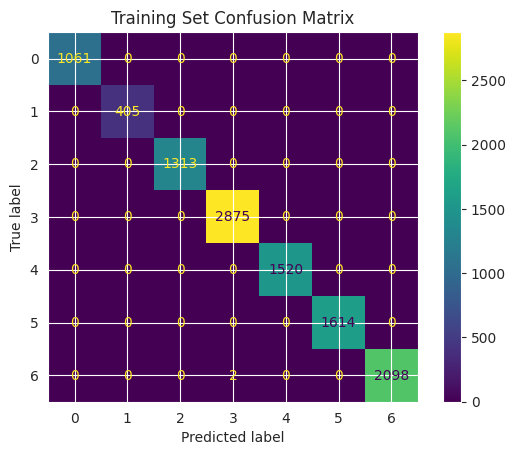

Test set evaluation:
[[240   0  12   0   0   3   6]
 [  0 117   0   0   0   0   0]
 [ 10   0 301   0   4   1   1]
 [  0   0   0 617   1   5  48]
 [  2   0   4   3 393   0   6]
 [  4   0   0  12   0 390   7]
 [  1   0   2  55   3   4 471]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       261
           1       1.00      1.00      1.00       117
           2       0.94      0.95      0.95       317
           3       0.90      0.92      0.91       671
           4       0.98      0.96      0.97       408
           5       0.97      0.94      0.96       413
           6       0.87      0.88      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



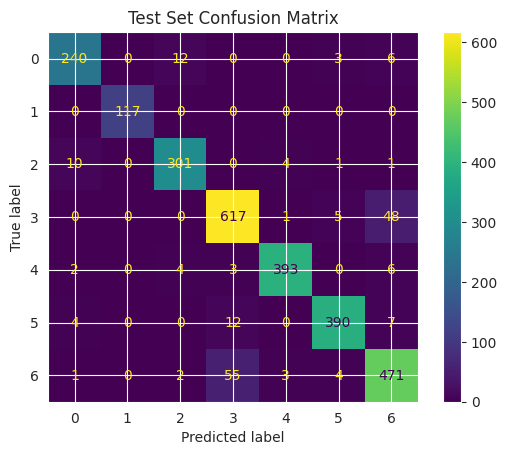

In [ ]:


############Load the dataset and preprocess it.


# Encode the target variable
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes

# Split the dataset into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###########Train the LightGBM model.
lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=7, random_state=42)
lgb_model.fit(X_train_scaled, y_train)


#############Evaluate the performance of the model and plot the confusion matrices.


y_pred_train = lgb_model.predict(X_train_scaled)
y_pred_test = lgb_model.predict(X_test_scaled)

print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix_train)
disp_train.plot()
plt.title("Training Set Confusion Matrix")
plt.show()

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix_test)
disp_test.plot()
plt.title("Test Set Confusion Matrix")
plt.show()


#End of LightGBM model

#CatBoost Model

Training set evaluation:
[[1035    0   18    0    2    0    6]
 [   0  405    0    0    0    0    0]
 [  10    0 1292    0    6    0    5]
 [   0    0    0 2850    1    8   16]
 [   1    0   11    4 1489    0   15]
 [   0    0    0    7    0 1600    7]
 [   1    0    1   35    5    4 2054]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1061
           1       1.00      1.00      1.00       405
           2       0.98      0.98      0.98      1313
           3       0.98      0.99      0.99      2875
           4       0.99      0.98      0.99      1520
           5       0.99      0.99      0.99      1614
           6       0.98      0.98      0.98      2100

    accuracy                           0.99     10888
   macro avg       0.99      0.99      0.99     10888
weighted avg       0.99      0.99      0.99     10888



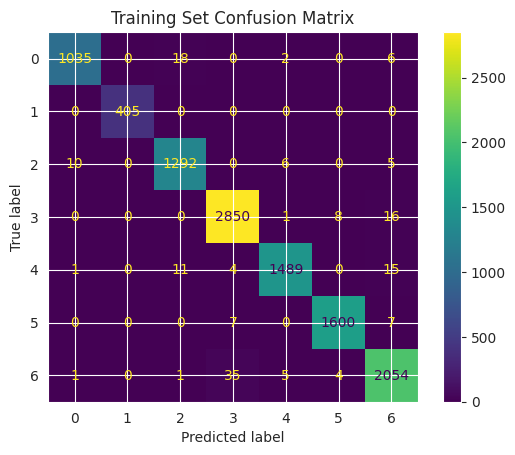

Test set evaluation:
[[244   0  12   0   0   1   4]
 [  0 117   0   0   0   0   0]
 [  9   0 301   0   5   1   1]
 [  0   0   0 612   2   6  51]
 [  2   0   5   3 390   0   8]
 [  5   0   0  12   0 389   7]
 [  0   0   1  48   6   5 476]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       261
           1       1.00      1.00      1.00       117
           2       0.94      0.95      0.95       317
           3       0.91      0.91      0.91       671
           4       0.97      0.96      0.96       408
           5       0.97      0.94      0.95       413
           6       0.87      0.89      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



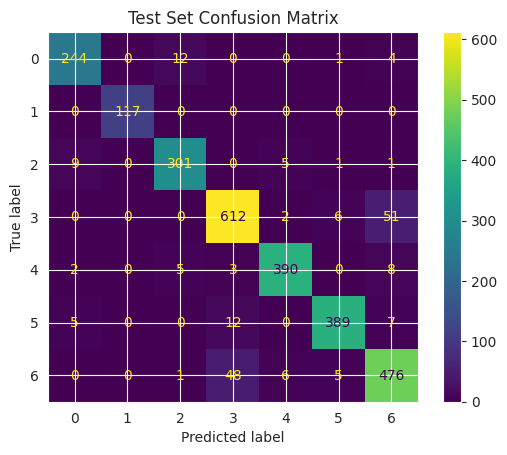

In [ ]:



############Load the dataset and preprocess it.

# Encode the target variable
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes

# Split the dataset into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

############Train the CatBoost model.

catboost_model = cb.CatBoostClassifier(loss_function='MultiClass', random_state=42, verbose=False)
catboost_model.fit(X_train_scaled, y_train)


############Evaluate the performance of the model and plot the confusion matrices.


y_pred_train = catboost_model.predict(X_train_scaled)
y_pred_test = catboost_model.predict(X_test_scaled)

print("Training set evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix_train)
disp_train.plot()
plt.title("Training Set Confusion Matrix")
plt.show()

print("Test set evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix_test)
disp_test.plot()
plt.title("Test Set Confusion Matrix")
plt.show()


#End of CatBoost Model

#choose The Best MODEL

In [ ]:


#############Load the dataset and preprocess it.

# Encode the target variable
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes

# Split the dataset into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###############Train the models and store them in a dictionary.
models = {
    'SVC': SVC(kernel='rbf', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(loss_function='MultiClass', random_state=42, verbose=False),
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

##################Compare the accuracy of the models and print the best one.
best_model = None
best_accuracy = 0

for name, model in models.items():
    y_pred_test = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_test)
    print(f"{name} accuracy: {accuracy:.2f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

print(f"\nThe best model is {best_model} with an accuracy of {best_accuracy:.2f}")


SVC accuracy: 0.93
Logistic Regression accuracy: 0.93
Decision Tree accuracy: 0.89
KNN accuracy: 0.92
MLP accuracy: 0.93
Random Forest accuracy: 0.93
XGBoost accuracy: 0.93
LightGBM accuracy: 0.93
CatBoost accuracy: 0.93

The best model is SVC with an accuracy of 0.93


#SVC OUTPUT TO CSV

In [ ]:
# Load the test set
test_df = pd.read_csv("Dry_Bean_Dataset.csv")

# Encode the target variable
test_df['Class'] = test_df['Class'].astype('category')
test_df['Class'] = test_df['Class'].cat.codes

# Split the test set into features and target variable
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Scale the test data using the same scaler used for training data
X_test_scaled = scaler.transform(X_test)

# Predict class labels for the test set
y_pred_test = dt.predict(X_test_scaled)

# Save the predictions along with instance ids in a .csv file
predictions_df = pd.DataFrame({'Instance_id': test_df.index + 1, 'Predicted_Class': y_pred_test})
predictions_df.to_csv('predictions.csv', index=False)

#END SVC OUTPUT

#END